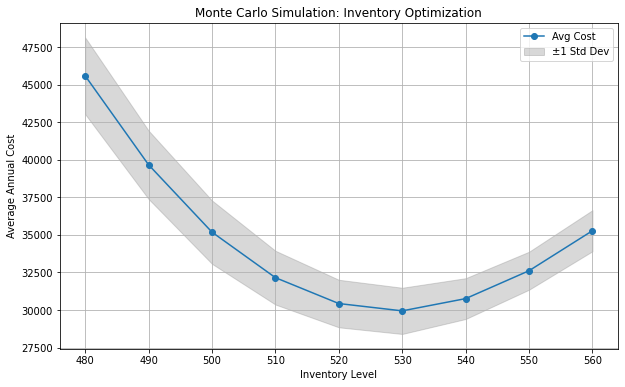

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define simulation parameters
np.random.seed(42)
days = 252  # business days in a year
simulations = 500
inventory_levels = range(480, 561, 10)  # test inventory from 480 to 560 units

# Step 2: Define cost parameters
holding_cost = 2      # per unit per day
stockout_cost = 5     # per unit shortfall

# Step 3: Simulate demand (normally distributed)
mean_demand = 500
std_dev_demand = 50

results = []

for inv in inventory_levels:
    total_costs = []
    for _ in range(simulations):
        daily_demand = np.random.normal(loc=mean_demand, scale=std_dev_demand, size=days)
        daily_demand = np.round(daily_demand).astype(int)

        # Calculate daily cost
        cost = np.where(daily_demand > inv,
                        (daily_demand - inv) * stockout_cost,
                        (inv - daily_demand) * holding_cost)
        total_costs.append(np.sum(cost))

    # Store results
    results.append({
        'Inventory_Level': inv,
        'Average_Cost': np.mean(total_costs),
        'Std_Dev_Cost': np.std(total_costs)
    })

# Step 4: Convert to DataFrame
df_results = pd.DataFrame(results)

# Step 5: Plot sensitivity analysis
plt.figure(figsize=(10,6))
plt.plot(df_results['Inventory_Level'], df_results['Average_Cost'], marker='o', label='Avg Cost')
plt.fill_between(df_results['Inventory_Level'],
                 df_results['Average_Cost'] - df_results['Std_Dev_Cost'],
                 df_results['Average_Cost'] + df_results['Std_Dev_Cost'],
                 color='gray', alpha=0.3, label='±1 Std Dev')
plt.xlabel('Inventory Level')
plt.ylabel('Average Annual Cost')
plt.title('Monte Carlo Simulation: Inventory Optimization')
plt.legend()
plt.grid(True)
plt.show()

#### What This Simulation Reveals

- You can test multiple inventory levels and see how costs behave under uncertainty.

- The gray band shows variability—helping you assess risk.

- The optimal inventory level is where average cost is minimized without excessive variability.
